<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/multicastap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import os
import pandas as pd
import numpy as np
#import pylab as plt
#from pylab import rcParams
import math
#import matplotlib as plt
import pylab as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import concatenate
from pylab import rcParams
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import TimeDistributed
from numpy import argmax


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
!ls /content/gdrive/MyDrive/client.csv
data2 = pd.read_csv('/content/gdrive/MyDrive/client.csv',sep='\t')
print(data2.columns)

/content/gdrive/MyDrive/client.csv
Index(['Date', 'Unnamed: 1', 'AP', 'Date1', 'AP_Num'], dtype='object')


In [30]:
final_df = data2.iloc[:,[3,4]]
final_df.head(10)

,Date1,AP_Num
0,3/3/2019 14:00,1
1,3/3/2019 14:01,1
2,3/3/2019 14:02,4
3,3/3/2019 14:03,4
4,3/3/2019 14:04,4
5,3/3/2019 14:05,7
6,3/3/2019 14:06,7
7,3/3/2019 14:07,10
8,3/3/2019 14:08,13
9,3/3/2019 14:09,13


In [38]:
#data = pd.read_csv('data.csv', usecols=['ts', 'rtd'])
data2 = final_df
testData2 = final_df
print(data2.head(10))

            Date1  AP_Num
0  3/3/2019 14:00       1
1  3/3/2019 14:01       1
2  3/3/2019 14:02       4
3  3/3/2019 14:03       4
4  3/3/2019 14:04       4
5  3/3/2019 14:05       7
6  3/3/2019 14:06       7
7  3/3/2019 14:07      10
8  3/3/2019 14:08      13
9  3/3/2019 14:09      13


In [32]:
#ap_num = data2.AP_Num.values
ap_num = to_categorical(data2.AP_Num.values, num_classes=16)

#data2 = data2.assign(date = pd.to_datetime(data2['Date'], unit='s'))

def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        i = i * 5
        #s find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
  
look_back=5
look_forward=5
n_features=16

trainX, trainY = split_sequence(ap_num, look_back, look_forward)
print(trainX[0])
print(trainY[0])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [33]:
#trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
#model.add(LSTM(100, activation='relu'))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.fit(trainX, trainY, epochs=100, verbose=2)
model.summary()


  

Epoch 1/100
66/66 - 20s - loss: 2.3598 - acc: 0.5398
Epoch 2/100
66/66 - 1s - loss: 1.6640 - acc: 0.6467
Epoch 3/100
66/66 - 1s - loss: 1.3438 - acc: 0.6911
Epoch 4/100
66/66 - 1s - loss: 1.1645 - acc: 0.7154
Epoch 5/100
66/66 - 1s - loss: 1.0599 - acc: 0.7295
Epoch 6/100
66/66 - 1s - loss: 0.9959 - acc: 0.7322
Epoch 7/100
66/66 - 1s - loss: 0.9483 - acc: 0.7387
Epoch 8/100
66/66 - 1s - loss: 0.9058 - acc: 0.7403
Epoch 9/100
66/66 - 1s - loss: 0.8803 - acc: 0.7473
Epoch 10/100
66/66 - 1s - loss: 0.8566 - acc: 0.7485
Epoch 11/100
66/66 - 1s - loss: 0.8384 - acc: 0.7510
Epoch 12/100
66/66 - 1s - loss: 0.8225 - acc: 0.7522
Epoch 13/100
66/66 - 1s - loss: 0.8108 - acc: 0.7552
Epoch 14/100
66/66 - 1s - loss: 0.7989 - acc: 0.7587
Epoch 15/100
66/66 - 1s - loss: 0.7906 - acc: 0.7597
Epoch 16/100
66/66 - 1s - loss: 0.7818 - acc: 0.7572
Epoch 17/100
66/66 - 1s - loss: 0.7731 - acc: 0.7592
Epoch 18/100
66/66 - 1s - loss: 0.7691 - acc: 0.7609
Epoch 19/100
66/66 - 1s - loss: 0.7607 - acc: 0.7602
E

In [34]:
print(trainX[0])
print(trainY[0])
print(ap_num[0])
def one_hot_decode(encoded_seq):
  w=len(encoded_seq)
  list = np.zeros((w,look_forward))
  #[[0 for x in range(look_forward)] for y in range(w)] 
  for i in range(w):
    for j in range(look_forward):
      #print(pred_train[:2])
      list[i][j]= int(argmax(encoded_seq[i][j]))
  return list

#tmp_pred_train = model.predict(trainX[0])
#print(tmp_pred_train)

pred_train = model.predict(trainX)
pred_train = one_hot_decode(pred_train)

pred_train = pred_train.flatten()

trainY = one_hot_decode(trainY) 
trainY = trainY.flatten()


print(pred_train[:1000])
print(trainY[:1000])


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 7.  7. 10. 13. 13. 13. 13. 13. 13.  1. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.  4.  4.  4.  1.  1. 13. 13.
  1.  4.  4.  7.  7. 10. 13. 13. 13. 13. 13. 13.  1. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.


In [39]:


test_ap = to_categorical(testData2.AP_Num.values, num_classes=16)
test_ap_scaled = test_ap

testX, testY = split_sequence(test_ap_scaled, look_back, look_forward)
#testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))


pred_test = model.predict(testX)
pred_test = one_hot_decode(pred_test)
pred_test = pred_test.flatten()

testY = one_hot_decode(testY)
testY = testY.flatten()

test_rmse = math.sqrt(mean_squared_error(testY, pred_test))
test_mae = mean_absolute_error(testY, pred_test)
  
print('test_rmse: %.2f' %test_rmse)
print('test_mae: %.2f' %test_mae)





#print(one_hot_decode(pred_test[:10]))

test_rmse: 4.05
test_mae: 1.72


[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 10.
 10.  7.  7.  4.  4.  4.  4.  1.  1.  1.  1.  4.  4.  4.  7.  7. 10. 13.
  1.  1.  4.  4.  4.  7.  7. 10. 13.  1.  1.  4.  4.  4.  7.  7. 10. 13.
  4.  8.  8.  8. 10. 10. 15. 15. 15.  1.  1.  4.  4.  4.  7.  7. 10. 13.
  1.  1.  4.  4.  4.  7.  7. 10. 13.  1.  1.  4.  4.  4.  7.  7. 10. 13.
  1.  1.  4.  4.  4.  7.  7. 10. 13.  1.  1.  4.  4.  4.  7.  7. 10. 13.
  1.  1.  4.  4.  4.  7.  7. 10. 13. 15. 15. 15. 15.  1.  1.  4.  4.  4.
  7.  7. 10. 13. 15. 15. 15. 15. 15. 15. 15.  1.  1.  4.  4.  4.  7.  7.
 10. 13. 13. 13. 13. 13. 13.  1.]
[13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13.  4.  4.  4.  1.  1. 13. 13.  1.  4.  4.  7.  7. 10. 13.
 13. 13. 13. 13. 13.  7.  7. 10. 13.  1.  1. 13.  4.  4.  7.  7. 13. 13.
  1. 13. 13.  4. 

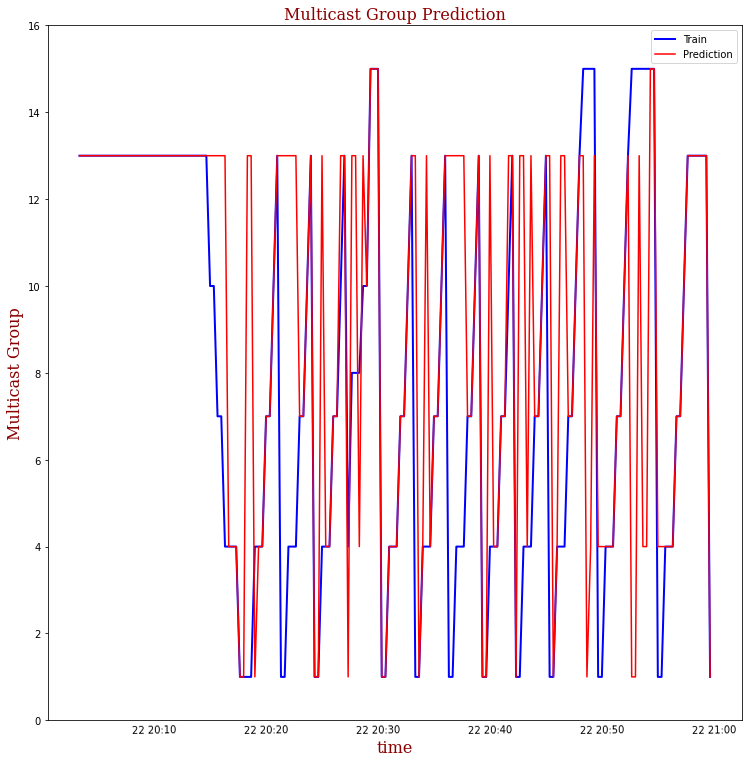

In [160]:
x = [datetime.datetime.fromtimestamp(1555961400) + datetime.timedelta(seconds=i) for i in range(0,86400,20)]
x1 = [i.time() for i in x]
x2=list()
#for i in range(1,86400):
#    if i%10==0:
#        x2.append(x1[i])
    

#t = 190
#t1 = 200
import matplotlib
from matplotlib.pyplot import figure
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5, forward=True)
t = 100
t1 = 270

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel('time', fontdict=font)
plt.ylabel('Multicast Group', fontdict=font)

plt.ylim(0, 16), #plt.xlim(0, 2*t), 
plt.plot(x[t:t1], trainY[t:t1], '-b', label='Train', linewidth=2, markersize=1),
plt.plot(x[t:t1], pred_train[t:t1], '-r', label = 'Prediction')
print(trainY[t:t1])
print(pred_train[t:t1])
plt.tick_params(axis='x', width=0.1, length=0.2, direction='out',labelrotation=1)
plt.legend(loc='upper right')
plt.xticks(fontsize=10)
#fig, ax = plt.subplots()
#ax.plot(t, x)

#for label in ax.get_xticklabels():
#    label.set_ha("right")
#    label.set_rotation(45)

plt.tight_layout()
#plt.show()
#from matplotlib import pyplot as plt, dates as mdates
#formatter = mdates.DateFormatter("%Y-%m-%d")
#ax = plt.gca()
#ax.xaxis.set_major_formatter(formatter)
#locator = mdates.DayLocator()
#ax.xaxis.set_major_locator(locator)


plt.title('Multicast Group Prediction', fontdict=font)
# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(bottom=0.4, right=0.4)
plt.show()


In [ ]:
t = 1
t1 = 4000

plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t1], pred_test[t:t1], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()



In [ ]:
#@title
t = 3000
t1 = 3760
t2 = 3790
plt.ylim(0, 15), #plt.xlim(0, 2*t), 
plt.plot(x2[t:t1], testY[t:t1], '-b', label='test'),
plt.plot(x2[t:t2], pred_test[t:t2], '-r', label = 'pred_test')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('RTD (seconds)')
plt.show()


In [ ]:
!ls